In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import transforms,datasets
import torch.optim as optim
from torch.autograd import Variable
import torchvision
#import sys


import matplotlib.pyplot as plt
#import time

In [2]:
apply_transform = transforms.Compose([transforms.Resize(32), transforms.ToTensor()])
BatchSize = 256 # change according to system specs



trainset = datasets.MNIST(root='./MNIST', train=True, download=True, transform=apply_transform)
trainLoader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize,
                                          shuffle=True, num_workers=0) # Creating dataloader

# Validation set with random rotations in the range [-90,90]
testset = datasets.MNIST(root='./MNIST', train=False, download=True, transform=apply_transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BatchSize,
                                         shuffle=False, num_workers=0) # Creating dataloader
                                        

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST\MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST\MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST\MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST\MNIST\raw



C:\Users\Abhi\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
# Size of train and test datasets
print('No. of samples in train set: '+str(len(trainLoader.dataset)))
print('No. of samples in test set: '+str(len(testLoader.dataset)))


No. of samples in train set: 60000
No. of samples in test set: 10000


In [4]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)        
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

In [5]:
use_gpu = torch.cuda.is_available()
net1= LeNet()


print(net1)


if use_gpu:
    print('GPU is avaialble!')
    #net1 = net1.cuda()

    

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
GPU is avaialble!


In [0]:
criterion = nn.CrossEntropyLoss() 
learning_rate1 = 0.01
optimizer1 = optim.Adam(net1.parameters(), lr=learning_rate1) # ADAM 
num_epochs = 50

train_loss = []
train_acc = []
for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            #inputs, labels = inputs.cuda(),labels.cuda() 
           
        # Initializing model gradients to zero
        optimizer1.zero_grad() 
        # Data feed-forward through the network
        outputs1 = net1(inputs)
        # Predicted class is the one with maximum probability
        preds1 = torch.argmax(outputs1,dim=1)
        # Finding the loss
        loss = criterion(outputs1, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
        # Accumulate number of correct predictions
        running_corr += torch.sum(preds1==labels)    
        
    totalLoss1 = running_loss/(i+1)
    # Calculating gradients
    totalLoss1.backward()
    # Updating the model parameters
    # Updating the model parameters
    optimizer1.step()
        
    epoch_loss = running_loss.item()/(i+1)   #Total loss for one epoch
    epoch_acc = running_corr.item()/60000
    
    
         
    train_loss.append(epoch_loss) #Saving the loss over epochs for plotting the graph
    train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph
       
        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f} | Training Accuracy: {:.4f}'.format(epoch+1,num_epochs,epoch_loss,epoch_acc*100))

Epoch 1/50 : Training loss: 2.3025 | Training Accuracy: 10.2183
Epoch 2/50 : Training loss: 2.2699 | Training Accuracy: 32.5667
Epoch 3/50 : Training loss: 2.1718 | Training Accuracy: 19.4983
Epoch 4/50 : Training loss: 2.0114 | Training Accuracy: 27.8083
Epoch 5/50 : Training loss: 2.1228 | Training Accuracy: 24.2033
Epoch 6/50 : Training loss: 1.7989 | Training Accuracy: 42.9500
Epoch 7/50 : Training loss: 1.8416 | Training Accuracy: 38.1100
Epoch 8/50 : Training loss: 1.6017 | Training Accuracy: 49.7217
Epoch 9/50 : Training loss: 1.3612 | Training Accuracy: 60.2817
Epoch 10/50 : Training loss: 1.1182 | Training Accuracy: 64.0767
Epoch 11/50 : Training loss: 0.9177 | Training Accuracy: 69.8250
Epoch 12/50 : Training loss: 0.7791 | Training Accuracy: 74.3833
Epoch 13/50 : Training loss: 1.0483 | Training Accuracy: 67.0883
Epoch 14/50 : Training loss: 1.1910 | Training Accuracy: 64.4133
Epoch 15/50 : Training loss: 0.6705 | Training Accuracy: 77.7217
Epoch 16/50 : Training loss: 0.721

Text(0, 0.5, 'Training')

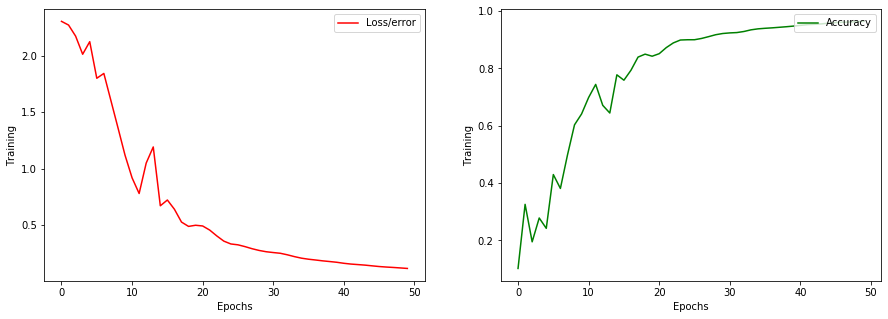

In [0]:
fig = plt.figure(figsize=[15,5]) 
plt.subplot(121)
plt.plot(range(num_epochs),train_loss,'r-',label='Loss/error') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.subplot(122)
plt.plot(range(num_epochs),train_acc,'g-',label='Accuracy') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')

In [0]:
correct_pred1=0
for data in testLoader:
    inputs,labels = data
    if use_gpu:
        inputs, labels = inputs.cuda(),labels.cuda()
    # Feedforward train data batch through model
    output = net1(inputs) 
    # Predicted class is the one with maximum probability
    preds1 = torch.argmax(output,dim=1)
    correct_pred1 += torch.sum(preds1==labels)

test_accuracy = correct_pred1.item()/10000.0
print('Testing accuracy (Batch size=256, lr=0.1 = ',test_accuracy*100) #for bathch1

Testing accuracy (Batch size=256, lr=0.1 =  96.61
